In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 3.9 MB/s eta 0:00:011     |███████████████████████████████ | 7.5 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 11.2 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
    ERROR: Command errored out with exit status 1:
     command: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/xs/jjbprzv52hn81bwg1p8ll93m0000gn/T/pip-install-79fuapw9/sklearn_eaf0946df0174589b88118e488fcba49/setup.py'"'"'; __file__='"'"'/private/var/folders/xs/jjbprzv52hn81bwg1p8ll93m0000gn/T/pip-install-79fuapw9/sklearn_eaf0946df0174589b88118e488fcba49/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/xs/jjbprzv52hn81bwg1p8ll93m0000gn/T/pip-pip-egg-info-n2it75sm
         cwd: /private/var/folders/xs/jjbprzv52hn81bwg1p8ll93m0000gn/T/pip-install-79fuapw

In [6]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.9 MB 4.3 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install libomp


Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement libomp (from versions: none)
ERROR: No matching distribution found for libomp
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
import shap



/Users/prasanthi/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 455 kB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.7 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 28.8 MB 4.3 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [15]:
import warnings
warnings.filterwarnings("ignore")


In [16]:
pd.set_option('display.max_columns', None)

In [20]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.info()
data.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(7043, 21)

In [21]:
data.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [22]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
data.drop(['customerID'], axis = 1, inplace = True)

In [24]:
Categorical_columns = data.select_dtypes('object').columns
Numerical_columns = data.select_dtypes(['int', 'float']).columns
print(Categorical_columns)
print(Numerical_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [25]:
data['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [26]:
for column in Categorical_columns:
  print(data[column].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
StreamingTV
No                     2810
Y

In [27]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna(subset=['TotalCharges'])

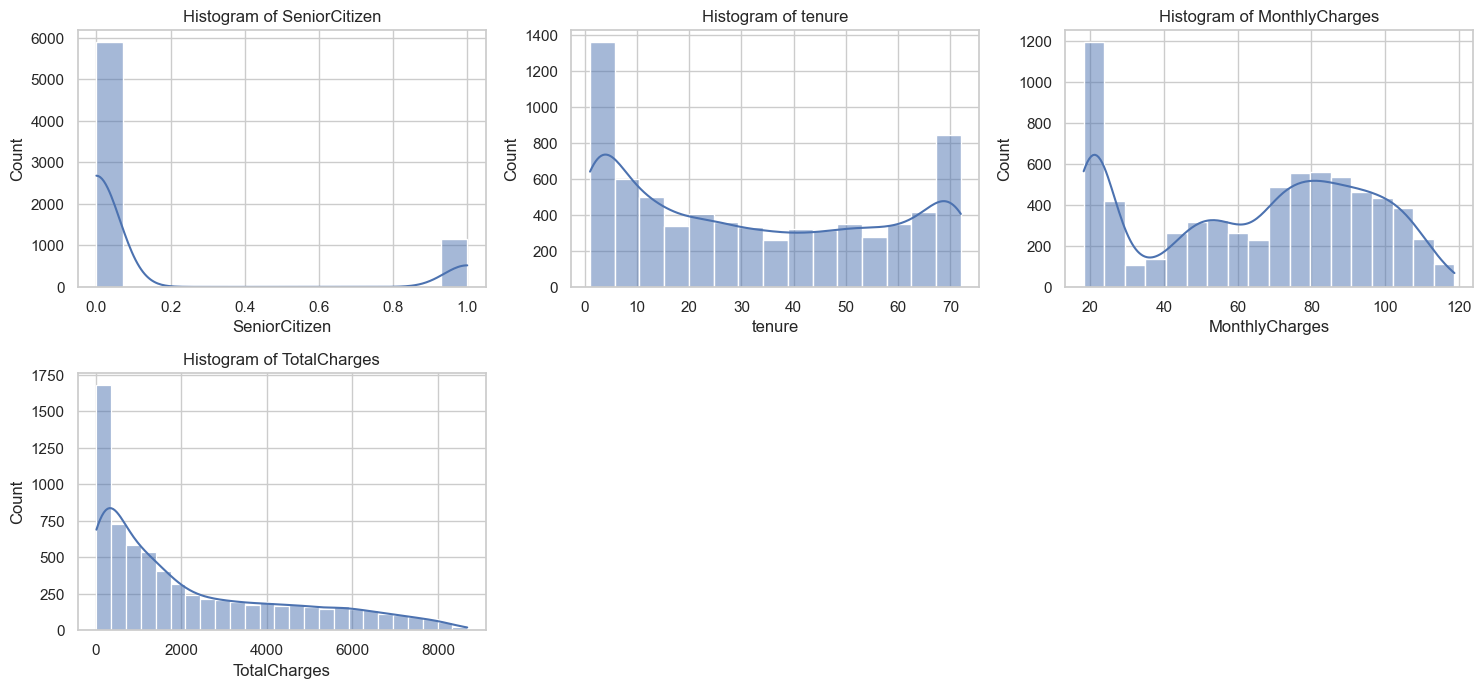

In [28]:
sns.set(style="whitegrid")
Numerical_columns = data.select_dtypes(['int', 'float']).columns
numerical_data = data[Numerical_columns]

# 1. Histograms for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(Numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust rows and columns as needed
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()




## Observations:

* ### Column SeniorCitizen has a mostly uniform distribution or binary pattern, it might work better as a categorical variable, especially if it only takes a few discrete values.

* ### The columns MonthlyCharges and TotalCharges are right-skewed, transformations such as log, square root, or Box-Cox transformations can help make the data more normally distributed.

* ### tenure shows peaks at certain values if customers have specific contract durations. we can create bins like "New", "Short-term", "Mid-term", and "Long-term" to group customers based on loyalty length.

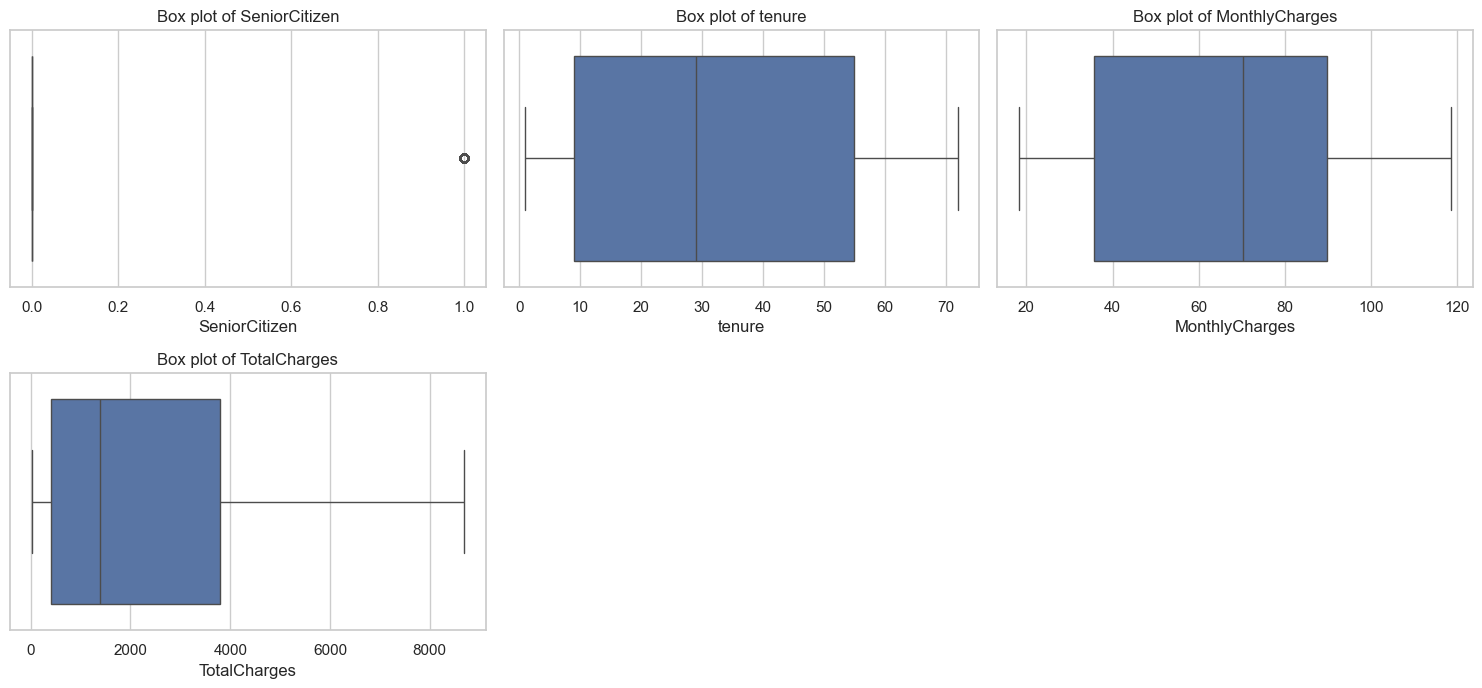

In [29]:
# 2. Box plots to identify outliers in numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(Numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

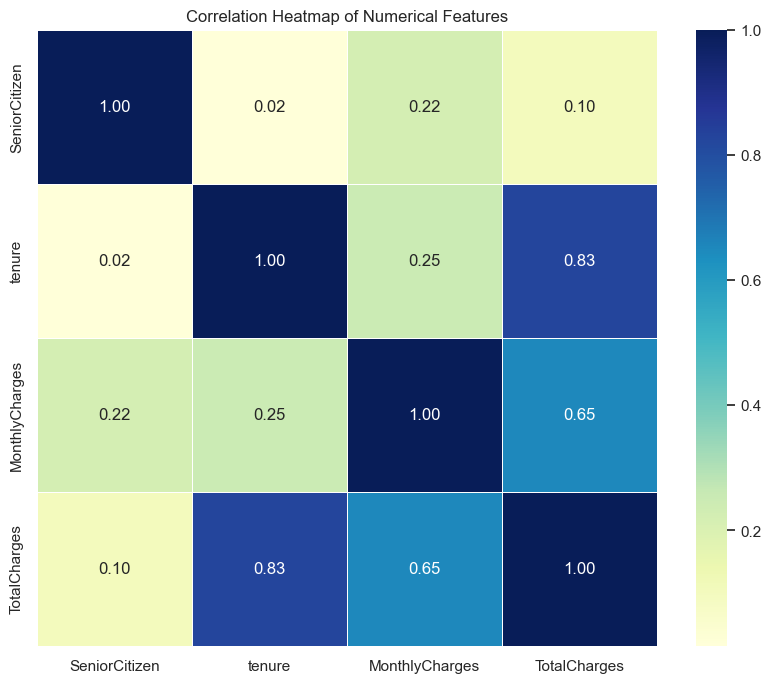

In [30]:
#  Heatmap for correlation between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Observations:
### Features with high correlations can sometimes be redundant, potentially impacting model interpretability and performance. TotalCharges and tenure are highly correlated, we might keep only one of them or combine them in some way.

### Principal Component Analysis (PCA) or other dimensionality reduction techniques can help reduce multicollinearity.

* Binning tenure into categories allows the model to better understand customer loyalty groups.
### New features:
*Charges Ratio (charges_ratio): The ratio of monthly charges to total charges can indicate if high-churn customers are short-term but high-paying or long-term with lower monthly charges.
* Senior Citizen and Monthly Charges Interaction (senior_charges_interaction): This interaction captures if senior customers are more likely to churn when monthly charges are high.
* Contract and Tenure Interaction (contract_tenure_interaction): Helps capture loyalty and retention based on contract types and tenure lengths.
* High Monthly Charges Indicator (high_monthly_charge): A binary feature to identify customers with high monthly charges, which may correlate with churn.

In [31]:

data['tenure_category'] = pd.qcut(data['tenure'], q=4, labels=['New', 'Short-term', 'Mid-term', 'Long-term'])

# Encode tenure_category as numeric
tenure_encoder = LabelEncoder()
data['tenure_category'] = tenure_encoder.fit_transform(data['tenure_category'])

# #  Monthly Charges to Total Charges Ratio
# # This feature captures the average monthly charge relative to total charges.
# data['charges_ratio'] = data['MonthlyCharges'] / (data['TotalCharges'])

# #  Senior Citizen and Monthly Charges Interaction
# # Higher charges might have different implications for senior citizens in terms of churn risk.
# data['senior_charges_interaction'] = data['SeniorCitizen'] * data['MonthlyCharges']

# #  Contract Type and Tenure Interaction
# # Interaction between contract type and tenure length - this might capture loyalty by contract.
# data['contract_tenure_interaction'] = data['Contract'] * data['tenure']

#  High Monthly Charges Indicator
# A binary indicator for high monthly charges, defined as above the 75th percentile.
high_charge_threshold = data['MonthlyCharges'].quantile(0.75)
data['high_monthly_charge'] = (data['MonthlyCharges'] > high_charge_threshold).astype(int)

data.drop(['tenure'], axis = 1, inplace = True)

# Display the new features
data[['tenure_category', 'high_monthly_charge']].head()


,tenure_category,high_monthly_charge
0,2,0
1,1,0
2,2,0
3,1,0
4,2,0


In [32]:
print(data['tenure_category'].value_counts())
print(data['high_monthly_charge'].value_counts())

tenure_category
2    1843
0    1755
1    1719
3    1715
Name: count, dtype: int64
high_monthly_charge
0    5274
1    1758
Name: count, dtype: int64


In [33]:
data['SeniorCitizen'].value_counts()
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

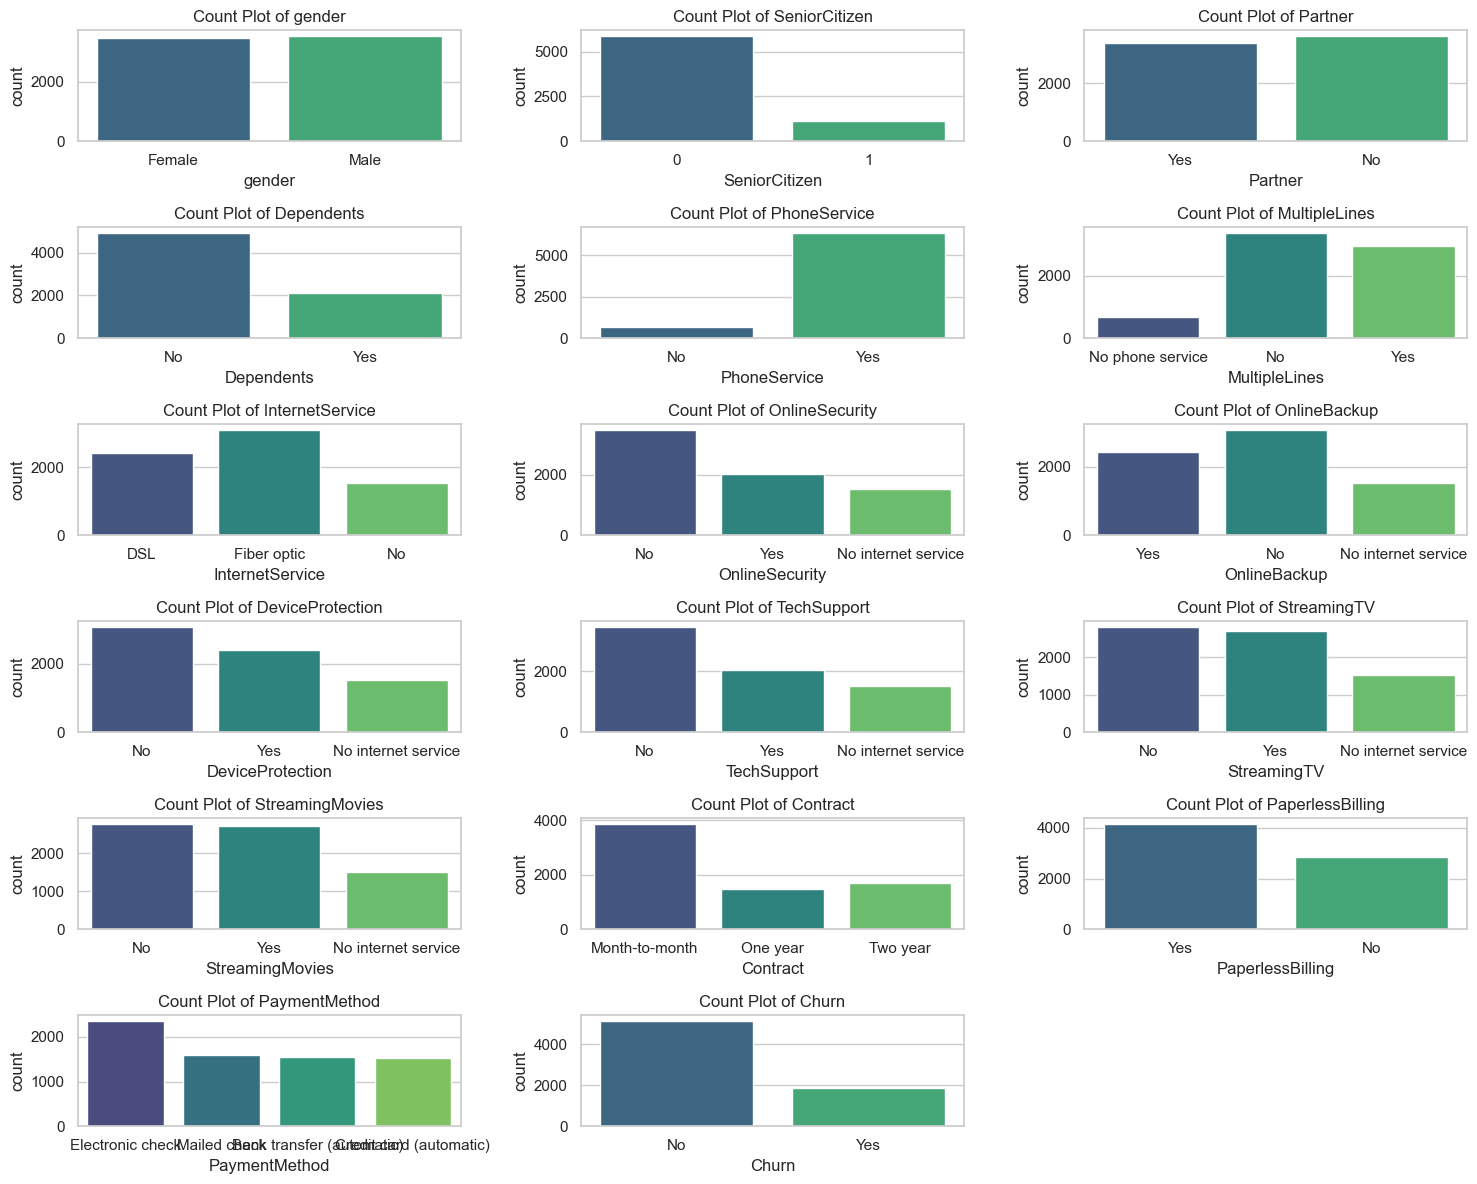

In [34]:
plt.figure(figsize=(15, 12))

Categorical_columns = data.select_dtypes(['object']).columns
# Adjust rows and columns based on the number of categorical columns
num_cols = len(Categorical_columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # This will calculate the required number of rows

for i, col in enumerate(Categorical_columns, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=col, data=data, palette="viridis")
    plt.title(f"Count Plot of {col}")
    plt.xticks()

plt.tight_layout()
plt.show()

In [35]:
data['PhoneService'].value_counts()


PhoneService
Yes    6352
No      680
Name: count, dtype: int64

In [36]:
Categorical_columns = data.select_dtypes('object').columns
Numerical_columns = data.select_dtypes(['int', 'float']).columns
print(Categorical_columns)
print(Numerical_columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Index(['MonthlyCharges', 'TotalCharges', 'tenure_category',
       'high_monthly_charge'],
      dtype='object')


In [37]:
data.isna().sum()

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
tenure_category        0
high_monthly_charge    0
dtype: int64

In [38]:
## Encode categorical columns
label_encoders = {}
for column in Categorical_columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               7032 non-null   int64  
 1   SeniorCitizen        7032 non-null   int64  
 2   Partner              7032 non-null   int64  
 3   Dependents           7032 non-null   int64  
 4   PhoneService         7032 non-null   int64  
 5   MultipleLines        7032 non-null   int64  
 6   InternetService      7032 non-null   int64  
 7   OnlineSecurity       7032 non-null   int64  
 8   OnlineBackup         7032 non-null   int64  
 9   DeviceProtection     7032 non-null   int64  
 10  TechSupport          7032 non-null   int64  
 11  StreamingTV          7032 non-null   int64  
 12  StreamingMovies      7032 non-null   int64  
 13  Contract             7032 non-null   int64  
 14  PaperlessBilling     7032 non-null   int64  
 15  PaymentMethod        7032 non-null   int64 

In [40]:
Numerical_columns

Index(['MonthlyCharges', 'TotalCharges', 'tenure_category',
       'high_monthly_charge'],
      dtype='object')

In [41]:
X = data.drop(['Churn'], axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
scaler = StandardScaler()
X_train[Numerical_columns] = scaler.fit_transform(X_train[Numerical_columns])
X_test[Numerical_columns] = scaler.transform(X_test[Numerical_columns])


In [44]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 258 kB 7.8 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [47]:
from sklearn.feature_selection import RFE

In [48]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
X_train_sm_rfe = rfe.fit_transform(X_train_sm, y_train_sm)
X_test_rfe = rfe.transform(X_test)
selected_features = X.columns[rfe.support_]

# Model Training
final_model = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)
final_model.fit(X_train_sm_rfe, y_train_sm)

# Predictions and Evaluation
y_pred = final_model.predict(X_test_rfe)
print("Selected Features:", selected_features)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, final_model.predict_proba(X_test_rfe)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Selected Features: Index(['gender', 'SeniorCitizen', 'Dependents', 'PhoneService',
       'InternetService', 'OnlineSecurity', 'Contract', 'MonthlyCharges',
       'TotalCharges', 'tenure_category'],
      dtype='object')
Accuracy: 0.7427149964463398
Precision: 0.51171875
Recall: 0.7005347593582888
F1 Score: 0.5914221218961625
AUC-ROC: 0.808514217972677
Confusion Matrix:
 [[783 250]
 [112 262]]


In [49]:
import joblib

In [53]:
x_test = pd.DataFrame(X_test_rfe)

In [54]:
x_test.to_csv("x_test")

In [50]:
joblib.dump(final_model, "model.pkl")

['model.pkl']

In [32]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500)
}

## Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }


In [33]:
pd.DataFrame(results)

,Logistic Regression,Random Forest,XGBoost,Neural Network
Accuracy,0.784648,0.785359,0.777541,0.743426
Precision,0.628159,0.624138,0.599349,0.516883
Recall,0.465241,0.483957,0.491979,0.532086
F1 Score,0.534562,0.545181,0.540382,0.524374
AUC-ROC,0.823545,0.808286,0.811835,0.758072
Confusion Matrix,"[[930, 103], [200, 174]]","[[924, 109], [193, 181]]","[[910, 123], [190, 184]]","[[847, 186], [175, 199]]"
